## Table of Content
* <b>1. Project Overview
*   1.1 Introduction
*    1.1.1 Problem Statement
*  1.2 Objectives
* <b> 2. Importing Packages
* <b> 3. Loading Data
* <b> 4. Exploratory Data Analysis (EDA)
* <b> 4.1 Summary
* <b> 4.2 Data Cleaning
* <b> 5. Regression Analysis
* <b> 6. Conclusion<b> 

# 1. Project Overview

## 1.1 Introduction

> Objective: The purpose of this project is to analyze the factors influencing total CO₂ emissions by examining predictors such as savanna fires, urban population, and the gender composition of the population (male and female). By studying these relationships, the analysis aims to uncover patterns and trends, understand how these factors contribute to emissions, and provide insights into the dynamics of environmental and demographic influences on total CO₂ output.

> Importance of study: Studying CO₂ emissions caused by various factors, including natural processes and human activities, is crucial for understanding the dynamics of climate change and its impact on the environment. Natural processes, such as savanna fires, contribute significantly to carbon release, while human-driven factors like urbanization and demographic changes play a pivotal role in shaping emission trends. By analyzing these contributors, we can identify the relative influence of each factor, enabling the development of targeted mitigation strategies. This understanding is essential for crafting sustainable policies, balancing economic development with environmental conservation, and addressing global challenges such as rising temperatures, habitat loss, and air quality degradation.

> Data source: The dataset utilized was collected from diverse areas from the year of 1990 to 2020.

> Key question: Which factors have high contribution to CO2 emitted

> Methodology overview: Statistical models, such as linear regression and random forest, are used to analyze the relationship between these predictors and total CO₂ emissions. Feature importance techniques help identify which variables have the most significant impact on emissions. This analysis allows for quantifying the relative contributions of each predictor, offering insights into key drivers of CO₂ emissions.

> Expected outcomes: Urban population growth contributes to higher CO₂ emissions due to increased industrialization, transportation, and energy consumption in densely populated areas. CO₂ emissions will show seasonal fluctuations, with higher emissions during periods of increased human activity, such as the dry season for savanna fires


### 1.1.1 Problem statement

## 1.2 Objectives

## 2. Importing packages

In [8]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## 3. Loading data

In [91]:

dataset = pd.read_csv(r"C:\Users\bonas\Downloads\CO2_emission_agric\CO2_Emission_agric\co2_emission_agric.csv")
dataset = pd.DataFrame(dataset)
dataset

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  Manure Management  \
0            63.1152  -2388.8030  ...           319.1763   
1            61.2125  -2388.8030  ...           342.3079   
2            53.3170  -2388.8030  ...           349.1224   
3            54.3617  -2388.8030  ...           352.2947   
4            53.9874  -2388.8030  ...           367.6784   
...              ...         ...  ...                ...   
6960        251.1465  76500.2982  ...           282.5994   
6961        255.7975  76500.2982  ...           255.5900   
6962        327.0897  76500.2982  ...           257.2735   
6963        290.1893  76500.2982  ...           267.5224   
6964        238.7639  76500.2982  ...           266.7316   

      Fires in organic soils  Fires in humid tropical forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
...                      ...                              ...   
6960                     0.0                              0.0   
6961                     0.0                              0.0   
6962                     0.0                              0.0   
6963                     0.0                              0.0   
6964                     0.0                              0.0   

      On-farm energy use  Rural population  Urban population  \
0                    NaN         9655167.0         2593947.0   
1                    NaN        10230490.0         2763167.0   
2                    NaN        10995568.0         2985663.0   
3                    NaN        11858090.0         3237009.0   
4                    NaN        12690115.0         3482604.0   
...                  ...               ...               ...   
6960            417.3150        10934468.0         5215894.0   
6961            398.1644        11201138.0         5328766.0   
6962            465.7735        11465748.0         5447513.0   
6963            444.2335        11725970.0   

In [10]:
# Shape of dataset
dataset.shape

(6965, 31)

The dataset consist of 31 columns, which means 30 predictors plus target variable

In [11]:
# Copy of original dataset
df = dataset.copy()

# 4. Exploratory Data Analysis (EDA)

EDA is a crucial step in the data analysis pipeline. It is the process of analyzing and visualizing datasets to summarize their main characteristics and extract useful insights, often with the help of statistical graphics, plots, and other data visualization tools.

EDA can help identify the distribution 

## 4.1 Summary


In [12]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^0-9a-zA-Z_]', '', regex=True)
df.head()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice_Cultivation  Drained_organic_soils_CO2  Pesticides_Manufacturing  \
0            686.00                        0.0                 11.807483   
1            678.16                        0.0                 11.712073   
2            686.00                        0.0                 11.712073   
3            686.00                        0.0                 11.712073   
4            705.60                        0.0                 11.712073   

   Food_Transport  Forestland  ...  Manure_Management  Fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires_in_humid_tropical_forests  Onfarm_energy_use  Rural_population  \
0                              0.0                NaN         9655167.0   
1                              0.0                NaN        10230490.0   
2                              0.0                NaN        10995568.0   
3                              0.0                NaN        11858090.0   
4                              0.0                NaN        12690115.0   

   Urban_population  Total_Population__Male  Total_Population__Female  \
0         2593947.0               5348387.0                 5346409.0   
1         2763167.0               5372959.0                 5372208.0   
2         2985663.0               6028494.0                 6028939.0   
3         3237009.0               7003641.0                 7000119.0   
4         3482604.0               7733458.0                 7722096.0   

   total_emission  Average_Temperature_C  
0     2198.963539               0.536167  
1     2323.876629               0.020667  
2     2356.304229              -0.259583  
3     2368.470529               0.101917  
4     2500.768729               0.372250  

[5 rows x 31 columns]

Copy is convinient to make changes to without losing orinal data


In [13]:
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna_fires                    6934.0  1.188391e+03  5.246288e+03   
Forest_fires                     6872.0  9.193022e+02  3.720079e+03   
Crop_Residues                    5576.0  9.987063e+02  3.700345e+03   
Rice_Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained_organic_soils_CO2        6965.0  3.503229e+03  1.586145e+04   
Pesticides_Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food_Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6472.0 -1.782829e+04  8.183221e+04   
Net_Forest_conversion            6472.0  1.760564e+04  1.011575e+05   
Food_Household_Consumption       6492.0  4.847580e+03  2.578914e+04   
Food_Retail                      6965.0  2.043211e+03  8.494249e+03   
Onfarm_Electricity_Use           6965.0  1.626681e+03  9.343182e+03   
Food_Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood_Systems_Waste_Disposal  6965.0  6.018445e+03  2.215674e+04   
Food_Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers_Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6222.0  1.999150e+04  1.114209e+05   
Manure_applied_to_Soils          6037.0  9.232256e+02  3.226992e+03   
Manure_left_on_Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure_Management                6037.0  2.263345e+03  7.980542e+03   
Fires_in_organic_soils           6965.0  1.210316e+03  2.266985e+04   
Fires_in_humid_tropical_forests  6810.0  6.684529e+02  3.264879e+03   
Onfarm_energy_use                6009.0  3.008982e+03  1.263786e+04   
Rural_population                 6965.0  1.785774e+07  8.901521e+07   
Urban_population                 6965.0  1.693230e+07  6.574362e+07   
Total_Population__Male           6965.0  1.761963e+07  7.603993e+07   
Total_Population__Female         6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average_Temperature_C            6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna_fires                         0.000000       0.000000  1.651850e+00   
Forest_fires                          0.000000       0.000000  5.179000e-01   
Crop_Residues                         0.000200      11.006525  1.036982e+02   
Rice_Cultivation                      0.000000     181.260800  5.348174e+02   
Drained_organic_soils_CO2             0.000000       0.000000  0.000000e+00   
Pesticides_Manufacturing              0.000000       6.000000  1.300000e+01   
Food_Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2848.350000 -6.292000e+01   
Net_Forest_conversion                 0.000000       0.000000  4.444000e+01   
Food_Household_Consumption            0.000000      11.399950  1.554711e+02   
Food_Retail                           0.000000      26.818500  1.720426e+02   
Onfarm_Electricity_Use                0.000000       8.037600  2.912070e+01   
Food_Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood_Systems_Waste_Disposal       0.340000      86.680500  9.012757e+02   
Food_Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers_Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      39.031525  8.037066e+02   
Manure_applied_to_Soils               0.049000      16.303000  1.204439e+02   
Manure_left_on_Pasture                0.000700     139.669900  9.725674e+02   
Manure_Management                     0.432900      37.632100  2.698563e+02   
Fires_in_organic_soils                0.000000       0.000000  0.000000e+00   
Fires_in_humid_

In [14]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_CO2             0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
Onfarm_Electricity_Use                0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
Onfarm_energy_use                   956


In [ ]:
# Columns that consist of null values
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'IPPU',
       'Manure_applied_to_Soils', 'Manure_Management',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use'],
      dtype='object')

## Univariate Analysis

  ### Checking for distribution 
  let's plot a histogram of each of the columns with null values to understand the distribution of the data, 
  this will help conclude which measure of tendency to use to fill the null values.

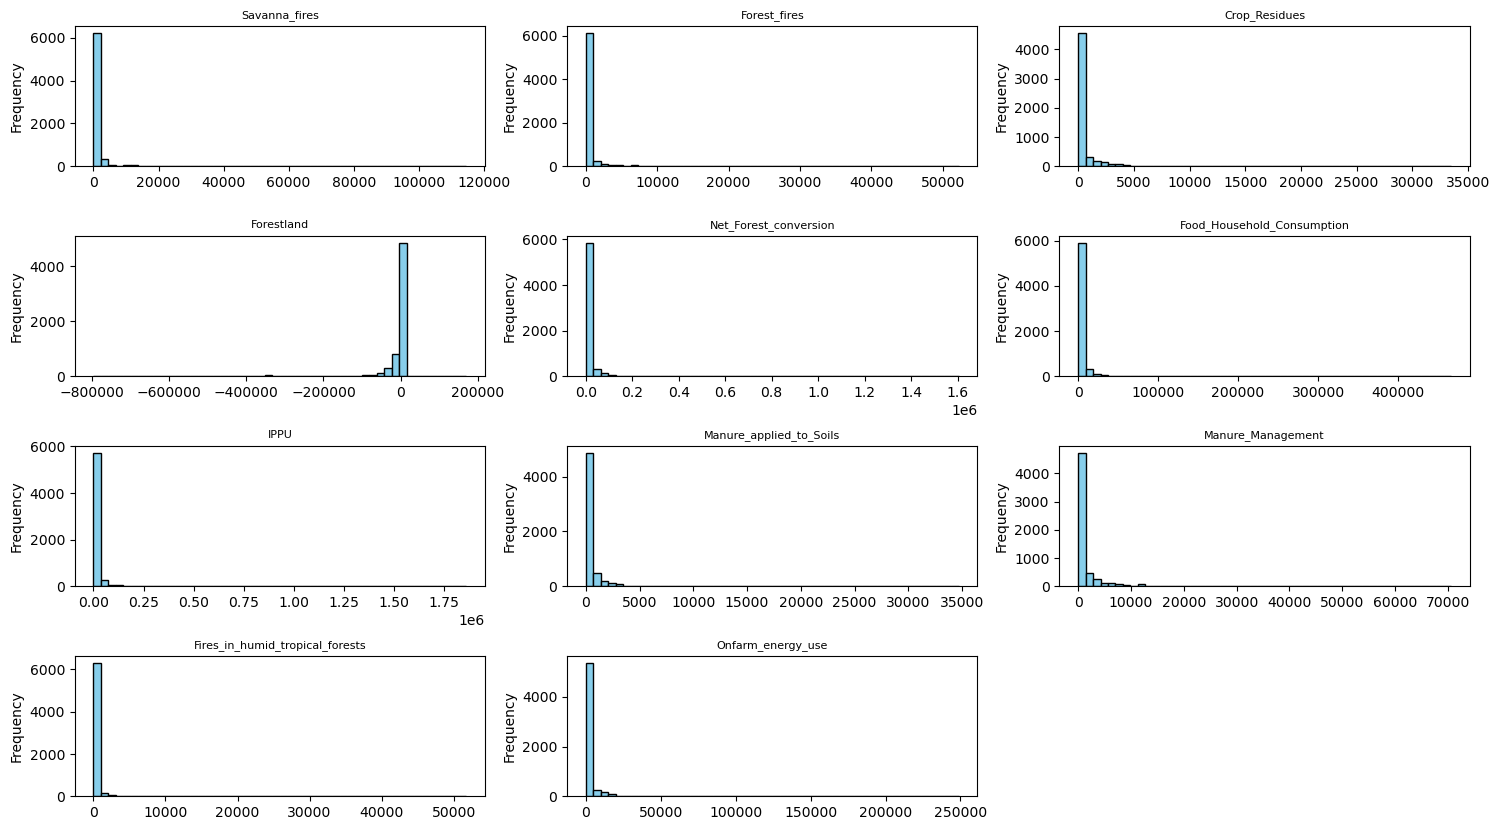

In [16]:
null_data = df.isnull()
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(hspace = 0.5, wspace=.2)

# Plot histograms for all columns
for i, column in enumerate(columns_with_null, 1):
    plt.subplot(4, 3, i)  # Adjust subplot grid (2 rows, 2 columns for this example)
    plt.hist(df[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{column}', fontsize= 8)
    plt.ylabel('Frequency')
    

## 4.2 Data cleaning

In [17]:
# fill null values for each column with column mean
for column in columns_with_null:
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\bonas\AppData\Local\Temp\ipykernel_23720\2076776446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [18]:
# To check if null values were filled successfully
df.isnull().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_CO2          0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
Onfarm_Electricity_Use             0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
Onfarm_energy_use                  0
Rural_population                   0
Urban_population                   0
T

# Bivariate analysis

## Checking for linearity

To ensure accurate predictions, we need to assess the linearity between predictor and response variables. This can be done by visualizing scatter plots to identify linear trends. If non-linearity is present, a linear regression model may not be suitable.


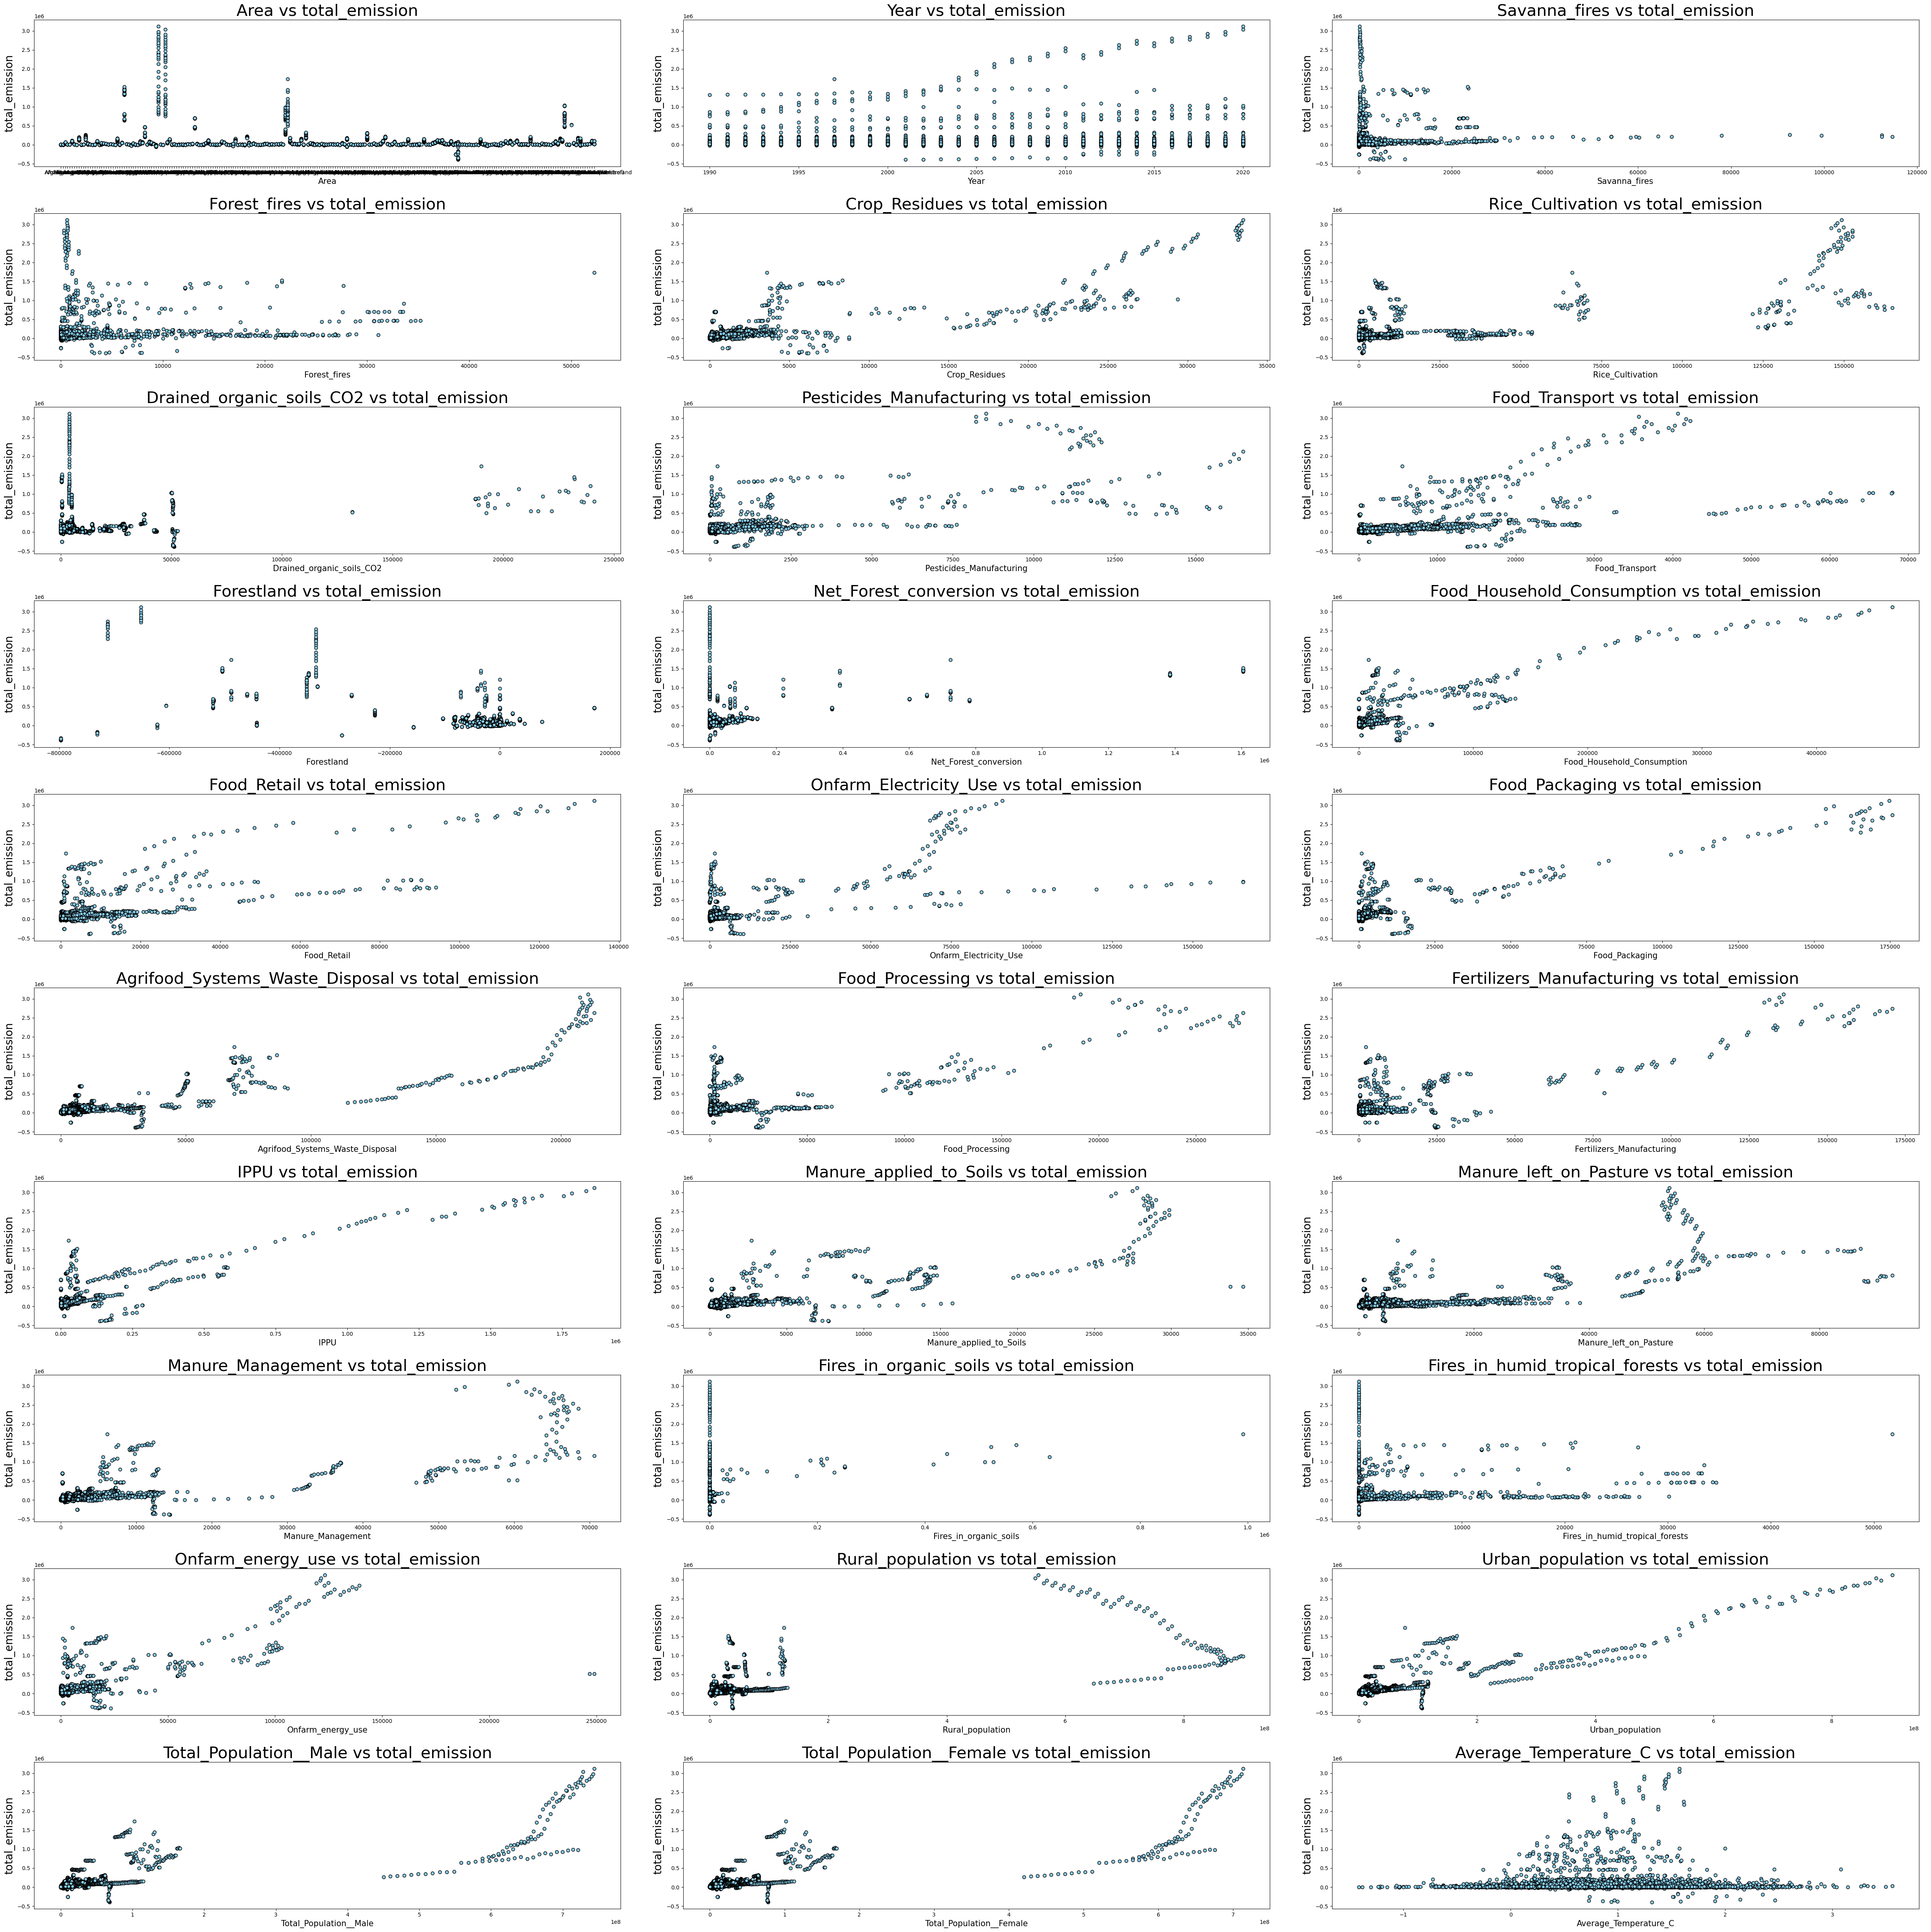

In [19]:
import math

target = 'total_emission'
features = ['Area', 'Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_CO2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'Average_Temperature_C']
 
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols) 

plt.figure(figsize=(50, 5* n_rows))
for i, feature in enumerate(features, start=1):
    plt.subplot(n_rows, n_cols, i)  # Create subplots
    plt.scatter(df[feature], df['total_emission'], color='skyblue', edgecolor='black')
    plt.title(f'{feature} vs {target}', fontsize=30)
    plt.xlabel(feature, fontsize= 15)
    plt.ylabel(target, fontsize= 20)

plt.tight_layout()
plt.show()

# Multivariate analysis

## Checking for multicolinearity

   Multicollinearity occurs when two or more predictor variables in a dataset are strongly correlated. This issue reduces model quality by increasing the standard error of coefficient estimates, making them less precise and leading to wider confidence intervals. Additionally, it complicates estimating the effect of individual predictors on the response variable, as coefficients become sensitive to small changes in the model or data, resulting in instability. 
   
   To test for multicollinearity, we will create paired scatter plots of the predictors and generate a correlation heatmap. These visualizations help identify and assess the strength of correlations among predictors

### Pairwise scatter plot

A pairwise scatter plot matrix creates an n×n grid, where 𝑛 is the number of predictor variables being compared. Each cell in the matrix represents the relationship between two pridictors. Diagonal cells show comparisons of a variable with itself, but instead of scatter plots, they typically display histograms or density plots. These diagonal elements highlight the univariate distribution of each variable, providing insights into the range and distribution of their values.

C:\Users\bonas\AppData\Local\Temp\ipykernel_23720\2589846800.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  g.fig.show()


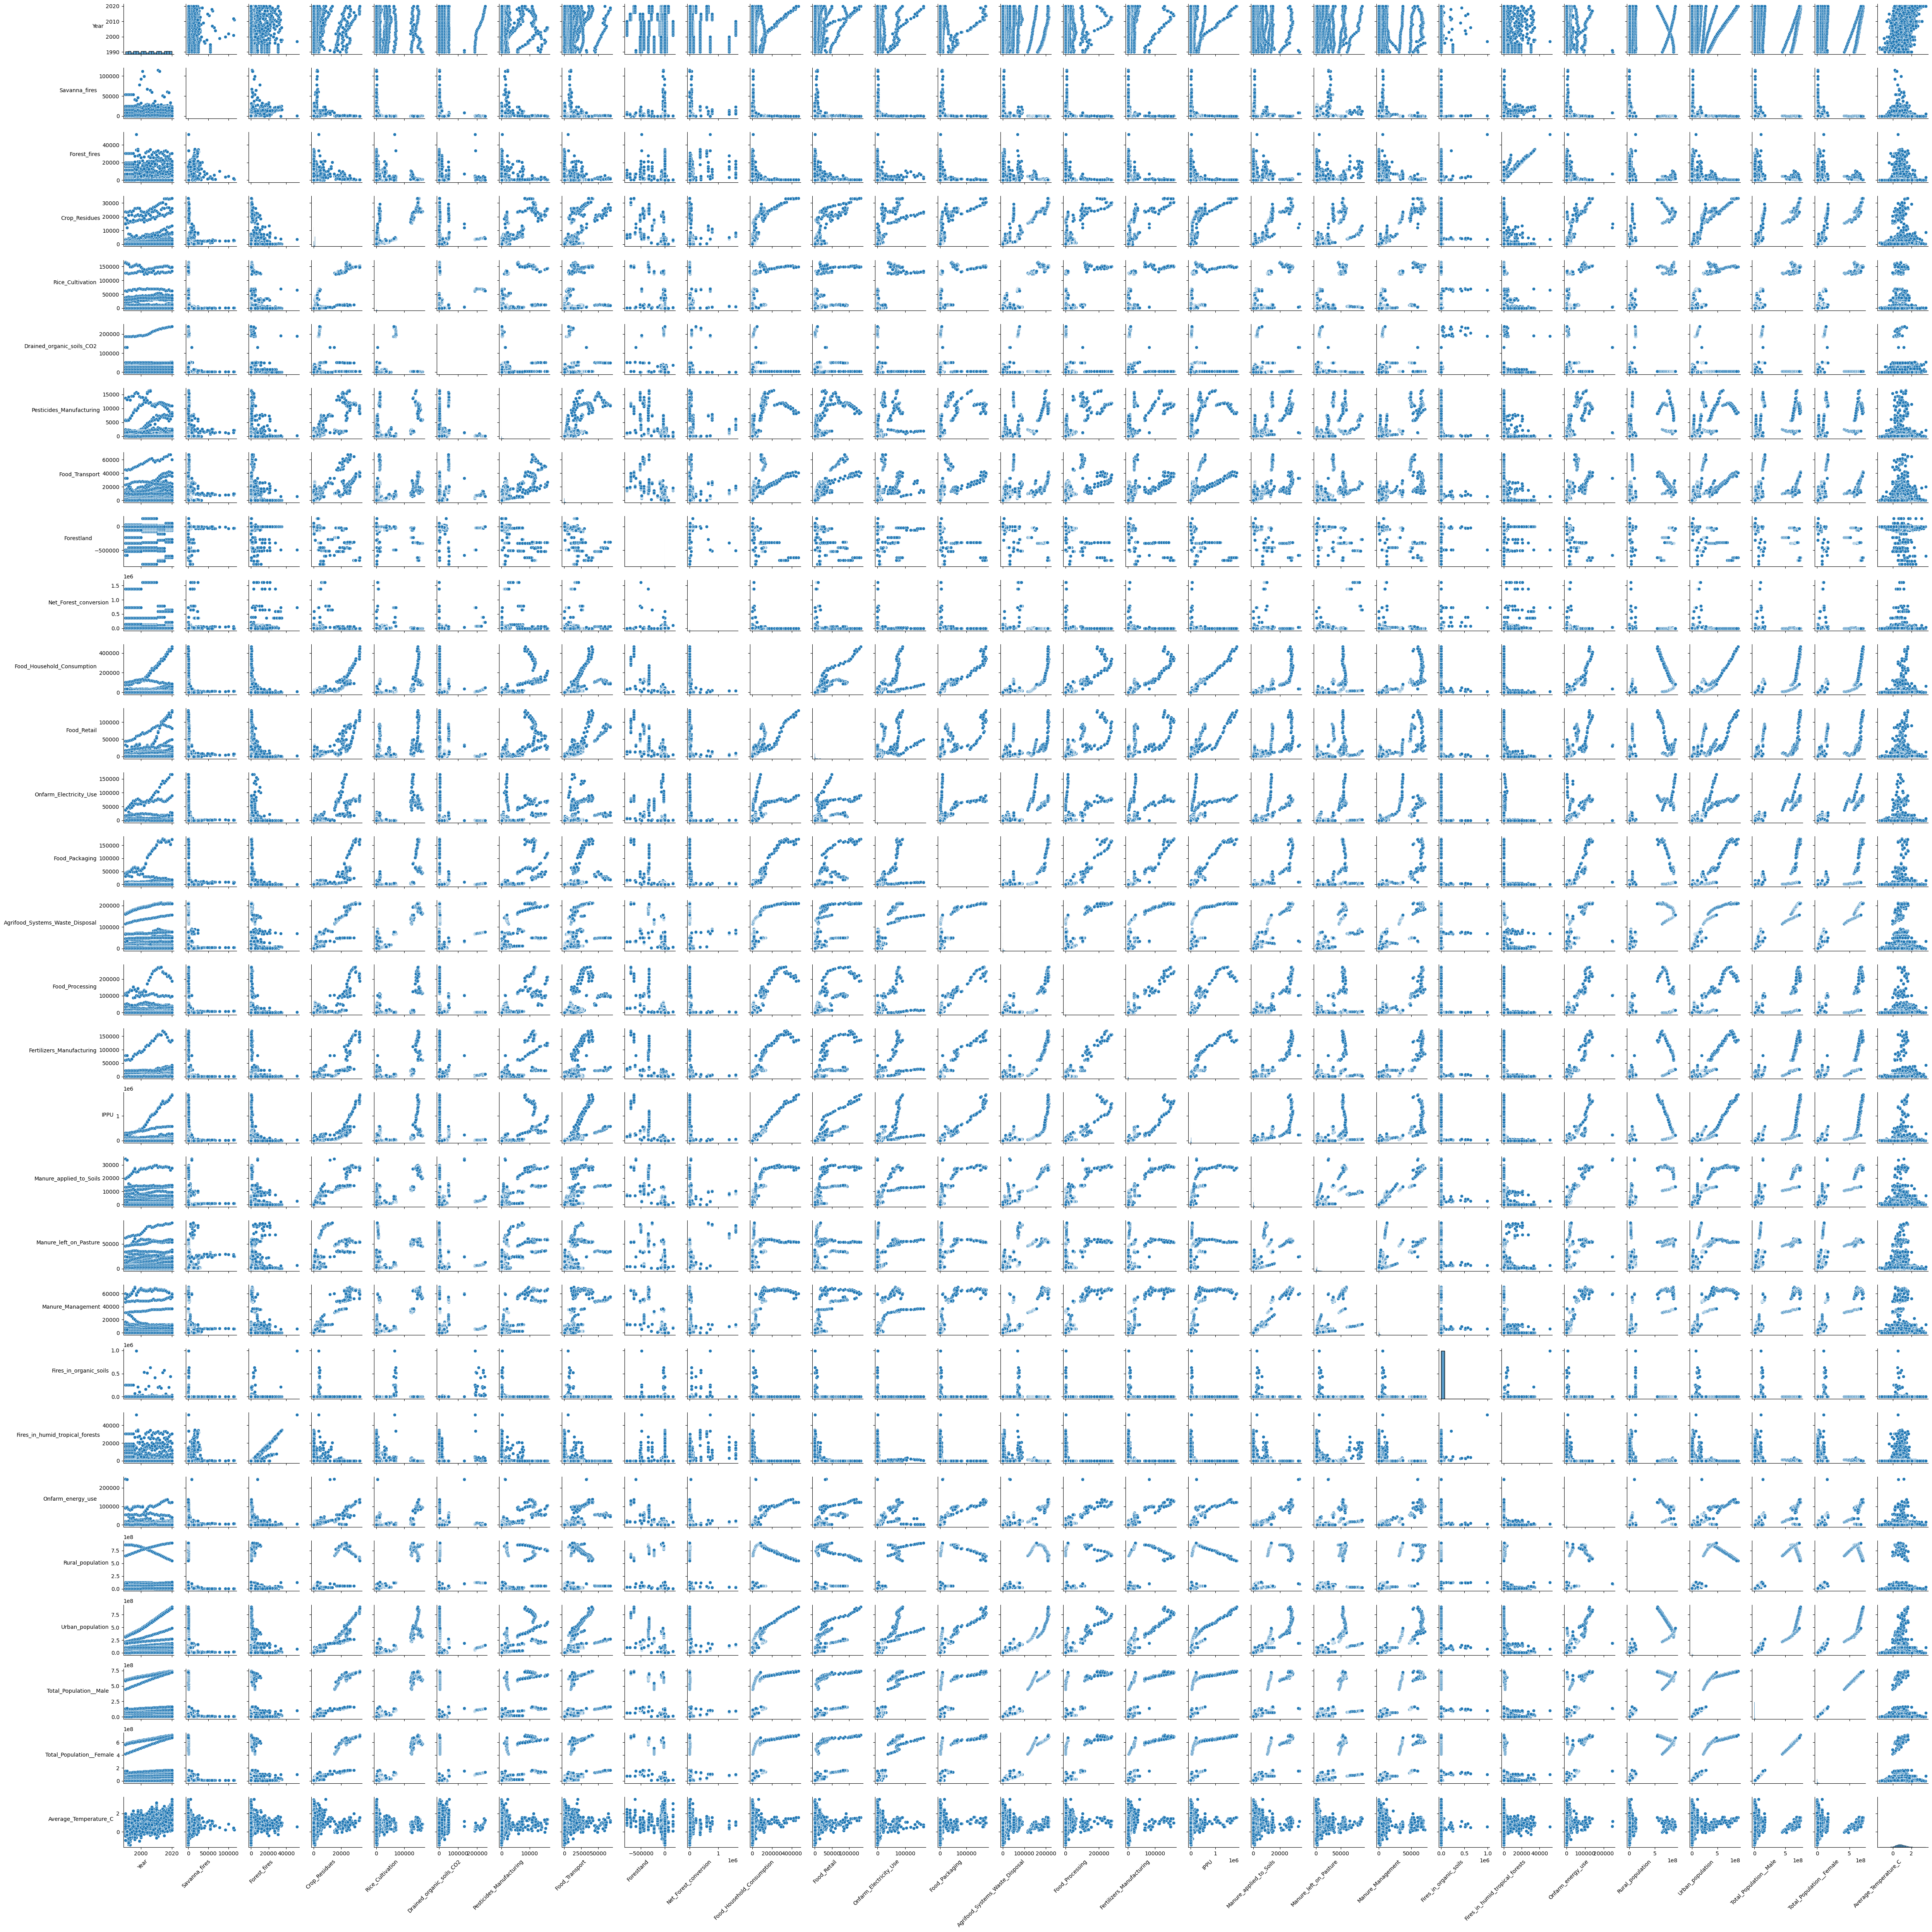

In [20]:
from seaborn import pairplot

g = pairplot(df.drop(columns=['total_emission', 'Area'], axis='columns'))
g.fig.set_size_inches(50,50)

for label in g.axes.flat:
    label.set_xlabel(label.get_xlabel(), rotation=45, ha='right', fontsize=10)
    label.set_ylabel(label.get_ylabel(), rotation=0, ha='right', fontsize=10)

# Adjust the layout to avoid overlap
g.fig.tight_layout()
g.fig.show()

## Correlation heatmap

<Figure size 1500x600 with 0 Axes>

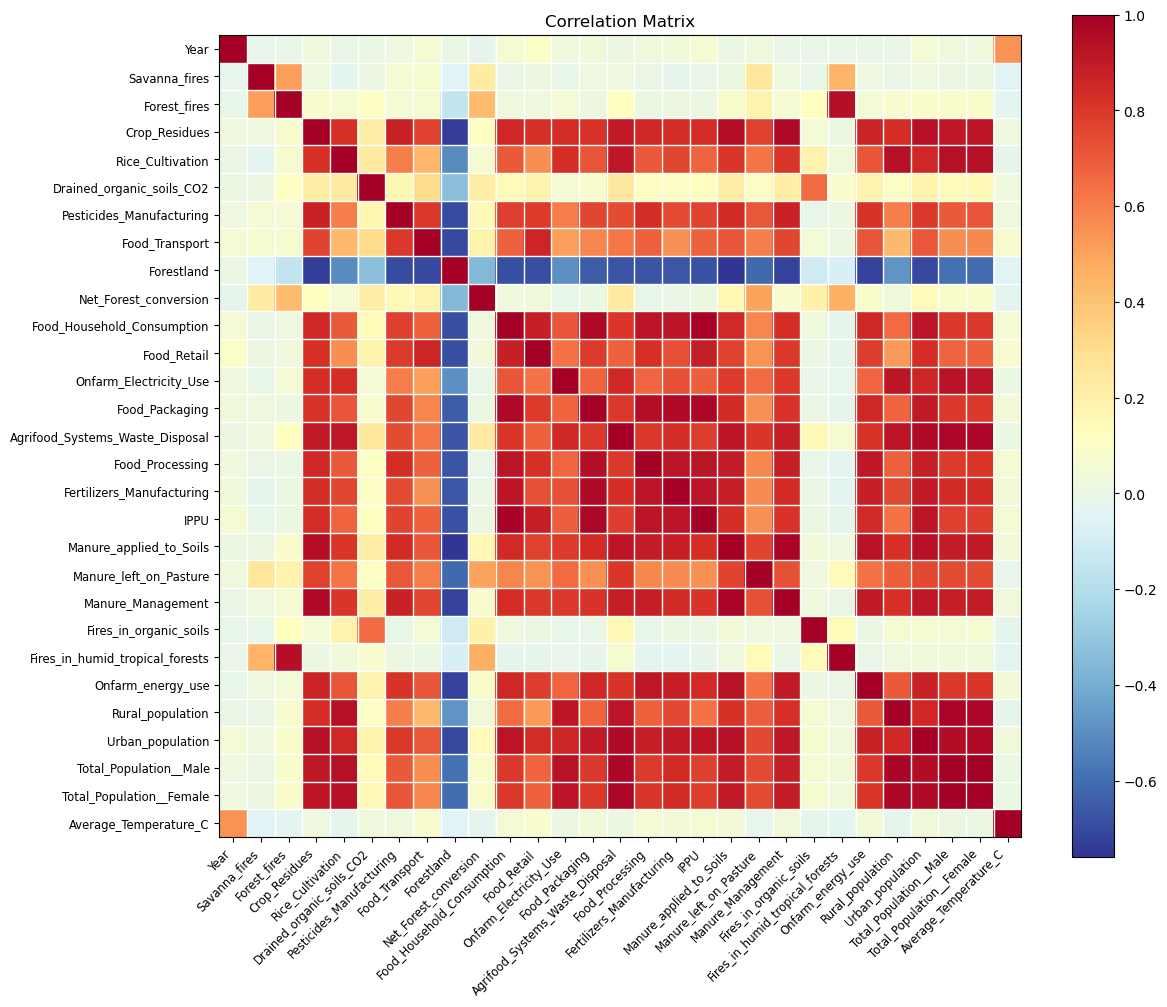

In [21]:
from statsmodels.graphics.correlation import plot_corr
corr = df.drop(columns=['total_emission', 'Area'], axis='columns').corr()

fig = plt.figure(figsize=(15, 6))
fig= plot_corr(corr,xnames=corr.columns)
fig.set_size_inches(15,15)

## Ordinal least squares

### Generate regression string

In the R programming language, fitting a machine learning model typically involves defining the relationship between variables using a formula-based interface. In this interface, a string of the form:

`y ~ X`

The string is read as "Regress *y* on $X$", indicating that we want to model the relationship between the response variable *y* and the predictor variable(s) $X$.

In Python's statsmodels library, the formula interface is used to define regression models. To fit a model using this approach, we need to construct a formula string. For example, a formula like y ~ $X_1$ + $X_2$ specifies a regression model where y is the dependent variable, and $X_1$ and $X_2$ are the predictors.

In [28]:
import statsmodels.formula.api as sm

target = 'total_emission'
independent_columns = ['Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_CO2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'total_emission', 'Average_Temperature_C']

formula_str = target+' ~ '+'+'.join(independent_columns)
formula_str


'total_emission ~ Year+Savanna_fires+Forest_fires+Crop_Residues+Rice_Cultivation+Drained_organic_soils_CO2+Pesticides_Manufacturing+Food_Transport+Forestland+Net_Forest_conversion+Food_Household_Consumption+Food_Retail+Onfarm_Electricity_Use+Food_Packaging+Agrifood_Systems_Waste_Disposal+Food_Processing+Fertilizers_Manufacturing+IPPU+Manure_applied_to_Soils+Manure_left_on_Pasture+Manure_Management+Fires_in_organic_soils+Fires_in_humid_tropical_forests+Onfarm_energy_use+Rural_population+Urban_population+Total_Population__Male+Total_Population__Female+total_emission+Average_Temperature_C'

In [29]:
# construct and fit model using OLS
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.282e+29
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:23   Log-Likelihood:             1.2064e+05
No. Observations:                6965   AIC:                        -2.412e+05
Df Residuals:                    6934   BIC:                        -2.410e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Get p-values for all features
p_values = fitted.pvalues  

# Filter for p-values < 0.05
significant_p_values = p_values[p_values < 0.05]
significant_p_values

In [ ]:
# generate regression string for significant predictors
significant_features = ['Savanna_fires', 'Rice_Cultivation', 'Drained_organic_soils_CO2', 'Food_Transport', 
                        'Forestland', 'Net_Forest_conversion', 'Food_Retail', 'Onfarm_Electricity_Use', 'Food_Packaging',
                        'Agrifood_Systems_Waste_Disposal', 'Food_Processing', 'Fertilizers_Manufacturing', 'IPPU', 
                        'Manure_left_on_Pasture', 'Fires_in_organic_soils', 'Fires_in_humid_tropical_forests', 
                        'Onfarm_energy_use', 'Rural_population', 'Urban_population', 'Total_Population__Male',
                        'Total_Population__Female']
formula_str = target+' ~ '+'+'.join(significant_features)
formula_str


'total_emission ~ Savanna_fires+Rice_Cultivation+Drained_organic_soils_CO2+Food_Transport+Forestland+Net_Forest_conversion+Food_Retail+Onfarm_Electricity_Use+Food_Packaging+Agrifood_Systems_Waste_Disposal+Food_Processing+Fertilizers_Manufacturing+IPPU+Manure_left_on_Pasture+Fires_in_organic_soils+Fires_in_humid_tropical_forests+Onfarm_energy_use+Rural_population+Urban_population+Total_Population__Male+Total_Population__Female'

In [ ]:
# ols model for significant features
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.752e+05
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:43   Log-Likelihood:                -72398.
No. Observations:                6965   AIC:                         1.448e+05
Df Residuals:                    6943   BIC:                         1.450e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Ensemble method

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[significant_features]
y = df['total_emission']

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_array = np.array(X)

# Normalise X and y
if X_array.ndim == 1:  # If X is 1D
    X_array = X_array.reshape(-1, 1)

# Scale X and y
X_scaled = x_scaler.fit_transform(X_array)
y_scaled = y_scaler.fit_transform(np.array(y).reshape(-1, 1))

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=6)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)



In [70]:
#Decision tree
from sklearn.metrics import r2_score

regr_tree = DecisionTreeRegressor(max_depth=3)
regr_tree.fit(x_train,y_train)
y_pred = regr_tree.predict(x_test)

print("r2: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

r2:  0.9092616249649611
RMSE:  0.33807276853209767


## Random forest regression

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [72]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse
r2

0.9226596538186685

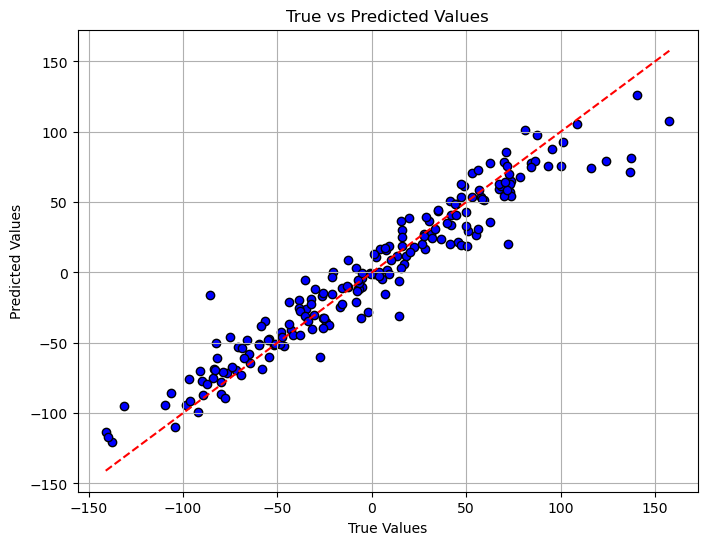

In [ ]:
# Random forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Total emission values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()

In [73]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

X = df.drop(columns=['Area', 'total_emission'], axis=1)
y = df['total_emission']

x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

X_standardise = pd.DataFrame(X_scaled,columns=X.columns)

X_standardise.describe().loc['std']  


Year                               1.000072
Savanna_fires                      1.000072
Forest_fires                       1.000072
Crop_Residues                      1.000072
Rice_Cultivation                   1.000072
Drained_organic_soils_CO2          1.000072
Pesticides_Manufacturing           1.000072
Food_Transport                     1.000072
Forestland                         1.000072
Net_Forest_conversion              1.000072
Food_Household_Consumption         1.000072
Food_Retail                        1.000072
Onfarm_Electricity_Use             1.000072
Food_Packaging                     1.000072
Agrifood_Systems_Waste_Disposal    1.000072
Food_Processing                    1.000072
Fertilizers_Manufacturing          1.000072
IPPU                               1.000072
Manure_applied_to_Soils            1.000072
Manure_left_on_Pasture             1.000072
Manure_Management                  1.000072
Fires_in_organic_soils             1.000072
Fires_in_humid_tropical_forests 

In [89]:
# Regularization  prevent overfitting by adjusting alpha
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(
    X_standardise, y, test_size=0.2, shuffle=True, random_state=42
)

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions_lm = lm.predict(X_test)
lm_r2 = r2_score(y_test, predictions_lm)
lm_rmse = np.sqrt(mean_squared_error(y_test, predictions_lm))

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
predictions_ridge = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, predictions_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, predictions_ridge))

# Decision Tree Regressor
regr_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
regr_tree.fit(X_train, y_train)
predictions_tree = regr_tree.predict(X_test)
tree_r2 = r2_score(y_test, predictions_tree)
tree_rmse = np.sqrt(mean_squared_error(y_test, predictions_tree))

# Print Results
print(f"Linear Regression - R2: {lm_r2}, RMSE: {lm_rmse}")
print(f"Ridge Regression - R2: {ridge_r2}, RMSE: {ridge_rmse}")
print(f"Decision Tree - R2: {tree_r2}, RMSE: {tree_rmse}")

Linear Regression - R2: 0.9994429359636732, RMSE: 6207.584044233593
Ridge Regression - R2: 0.9994433330052964, RMSE: 6205.371454290777
Decision Tree - R2: 0.959028868651944, RMSE: 53236.4424164498


### Stacking

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

# Define base learners
estimators = [
    ('lr', LinearRegression()),
    ('ridge', Ridge()),
    ('svr', SVR(kernel='linear'))
]

# Define the theoretical stacking model
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(x_train, y_train)
predictions_stacking = stacking_model.predict(x_test)
r2 = r2_score(y_test, predictions_stacking)
r2


0.00043018798305038963


### tuning
### residual analysis
### ensemble method


### Feature importance

In [94]:
# feature importance use random forest
feature_importances = rf_regressor.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Year, Importance: 0.17449752765049695
Feature: Savanna_fires, Importance: 0.5508857751545239
Feature: Forest_fires, Importance: 0.05662742848827456
Feature: Crop_Residues, Importance: 0.1424269468377559
Feature: Rice_Cultivation, Importance: 0.07556232186894889


In [95]:
important_features = ['Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Rice_Cultivation']
target = 'total_emission'

formula_str = target+' ~ '+'+'.join(important_features)
formula_str

'total_emission ~ Year+Savanna_fires+Forest_fires+Crop_Residues+Rice_Cultivation'

In [96]:
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3871.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:25:14   Log-Likelihood:                -91188.
No. Observations:                6965   AIC:                         1.824e+05
Df Residuals:                    6959   BIC:                         1.824e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.337e+06   3.18e+05  

## Homoscedasticity
  Check if residual variance remains constant along fitted values

### Residual analysis 

#### Normalization

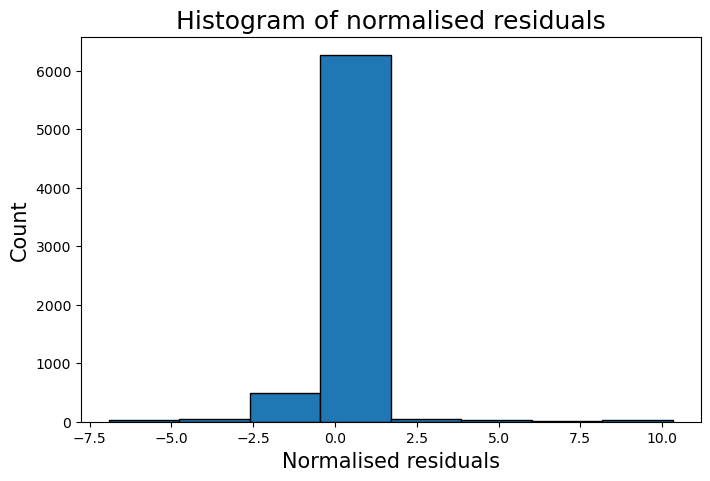

In [97]:
# distribution of residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalised residuals',fontsize=15)
plt.title("Histogram of normalised residuals",fontsize=18)
plt.show()

#### Residuals vs Fitted

To evaluate the presence of homoscedasticity or heteroscedasticity, we can plot the residuals against the fitted values (e.g., total emission). If the scatterplot displays a random and uniform spread of points, this indicates homoscedasticity, where the variance of residuals remains consistent across all levels of the predictor variable(s). In contrast, heteroscedasticity manifests as a systematic change in the spread of residuals with increasing or decreasing fitted values, often forming a cone-like pattern

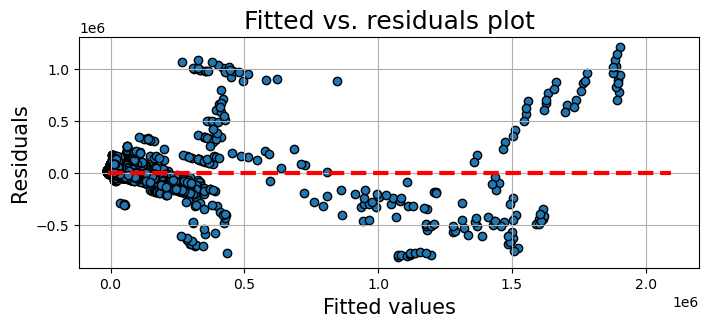

In [98]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

### Feature engineering

In [99]:
X = df[important_features]

x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

X_standardise = pd.DataFrame(X_scaled,columns=X.columns)

In [100]:
important_features = ['Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Rice_Cultivation']
target = 'total_emission'

formula_str = target+' ~ '+'+'.join(important_features)
formula_str

'total_emission ~ Year+Savanna_fires+Forest_fires+Crop_Residues+Rice_Cultivation'

In [102]:
df_for_ols = X_standardise.copy()
df_for_ols['total_emission'] = y

model=sm.ols(formula=formula_str, data=df_for_ols)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3871.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:39:01   Log-Likelihood:                -91188.
No. Observations:                6965   AIC:                         1.824e+05
Df Residuals:                    6959   BIC:                         1.824e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.409e+04   1407.406  

In [106]:
import statsmodels.stats.api as sms
# Calculate residuals
residuals = fitted.resid
# Perform Breusch-Pagan test
bp_test_result = sms.het_breuschpagan(residuals, fitted.model.exog)
print("Breusch-Pagan Test Results:")
print("LM Statistic:", bp_test_result[0])
print("LM-Test p-value:", bp_test_result[1])
print("F-Statistic:", bp_test_result[2])
print("F-Test p-value:", bp_test_result[3])

Breusch-Pagan Test Results:
LM Statistic: 2864.3996587193888
LM-Test p-value: 0.0
F-Statistic: 972.2165325091432
F-Test p-value: 0.0
